In [1]:
import pandas as pd
# Load the dataset
file_path = 'Final_data_file.csv'  # Update the path accordingly
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

C:\Users\conor\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Year,Denmark_Public_Debt_Pc_of_GDP,Ireland_Public_Debt_Pc_of_GDP,United Kingdom_Public_Debt_Pc_of_GDP,Denmark_Inflation,United Kingdom_Inflation,Ireland_Inflation,Denmark_GDP,United Kingdom_GDP,Ireland_GDP
0,1970,7.62,41.65,73.24,6.514841,6.366568,8.207190,1.596842,4.308886,3.469886
1,1971,7.72,39.85,65.55,5.869870,9.444837,8.961749,3.004996,3.504717,3.469886
2,1972,6.64,37.34,62.04,6.562361,7.071098,8.605817,3.929385,4.321668,6.489808
3,1973,5.85,35.09,54.56,9.303383,9.196033,11.414850,4.092946,6.523848,4.721428
4,1974,5.08,43.45,51.60,15.275206,16.044011,16.976127,-1.122394,-2.484404,4.260231


In [2]:
#Moving the target variable to the start of the dataframe
data.insert(1, 'Ireland_Public_Debt_Pc_of_GDP2', data['Ireland_Public_Debt_Pc_of_GDP'])
data.drop(columns=['Ireland_Public_Debt_Pc_of_GDP'], inplace=True)
data.rename(columns={'Ireland_Public_Debt_Pc_of_GDP2': 'Ireland_Public_Debt_Pc_of_GDP'}, inplace=True)

data.head()

,Year,Ireland_Public_Debt_Pc_of_GDP,Denmark_Public_Debt_Pc_of_GDP,United Kingdom_Public_Debt_Pc_of_GDP,Denmark_Inflation,United Kingdom_Inflation,Ireland_Inflation,Denmark_GDP,United Kingdom_GDP,Ireland_GDP
0,1970,41.65,7.62,73.24,6.514841,6.366568,8.207190,1.596842,4.308886,3.469886
1,1971,39.85,7.72,65.55,5.869870,9.444837,8.961749,3.004996,3.504717,3.469886
2,1972,37.34,6.64,62.04,6.562361,7.071098,8.605817,3.929385,4.321668,6.489808
3,1973,35.09,5.85,54.56,9.303383,9.196033,11.414850,4.092946,6.523848,4.721428
4,1974,43.45,5.08,51.60,15.275206,16.044011,16.976127,-1.122394,-2.484404,4.260231


In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [4]:
train_dates = (data['Year'])

In [5]:
print(train_dates[])

0     1970
1     1971
2     1972
3     1973
4     1974
5     1975
6     1976
7     1977
8     1978
9     1979
10    1980
11    1981
12    1982
13    1983
14    1984
15    1985
16    1986
17    1987
18    1988
19    1989
20    1990
21    1991
22    1992
23    1993
24    1994
25    1995
26    1996
27    1997
28    1998
29    1999
30    2000
31    2001
32    2002
33    2003
34    2004
35    2005
36    2006
37    2007
38    2008
39    2009
40    2010
41    2011
42    2012
43    2013
44    2014
45    2015
Name: Year, dtype: int64


In [6]:
cols = list(data)[1:10]

In [7]:
print(cols)

['Ireland_Public_Debt_Pc_of_GDP', 'Denmark_Public_Debt_Pc_of_GDP', 'United Kingdom_Public_Debt_Pc_of_GDP', 'Denmark_Inflation', 'United Kingdom_Inflation', 'Ireland_Inflation', 'Denmark_GDP', 'United Kingdom_GDP', 'Ireland_GDP']


In [8]:
df_for_training = data[cols].astype(float)

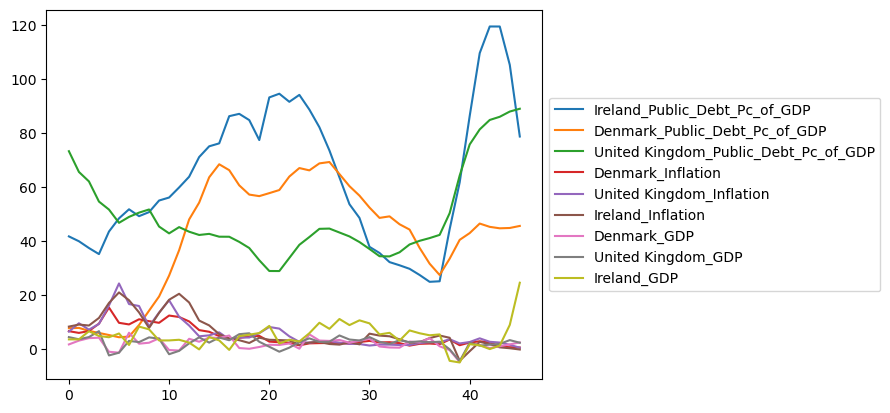

In [9]:
df_for_plot=df_for_training

ax = df_for_plot.plot.line()

# Move the legend to the side
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

In [10]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [12]:
trainX = []
trainY = []

n_future = 1
n_past = 7

for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
    trainX.append(df_for_training_scaled[i-n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i+n_future - 1:i+n_future,0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape =={}.'.format(trainX.shape))
print('trainY shape =={}.'.format(trainY.shape))

trainX shape ==(39, 7, 9).
trainY shape ==(39, 1).


In [14]:
model = Sequential()
model.add(LSTM(64,activation = 'relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32,activation='relu',return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 64)             18944     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 31393 (122.63 KB)
Trainable params: 31393 (122.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
history = model.fit(trainX, trainY, epochs=10, batch_size=16, validation_split=0.1)

Epoch 1/10

3/3 [==============================] - 3s 246ms/step - loss: 0.7893 - val_loss: 3.0369
Epoch 2/10
3/3 [==============================] - 0s 29ms/step - loss: 0.7522 - val_loss: 2.8985
Epoch 3/10
3/3 [==============================] - 0s 28ms/step - loss: 0.7052 - val_loss: 2.8069
Epoch 4/10
3/3 [==============================] - 0s 28ms/step - loss: 0.6385 - val_loss: 2.7304
Epoch 5/10
3/3 [==============================] - 0s 29ms/step - loss: 0.5809 - val_loss: 2.6482
Epoch 6/10
3/3 [==============================] - 0s 30ms/step - loss: 0.5572 - val_loss: 2.5688
Epoch 7/10
3/3 [==============================] - 0s 33ms/step - loss: 0.5016 - val_loss: 2.4244
Epoch 8/10
3/3 [==============================] - 0s 34ms/step - loss: 0.3801 - val_loss: 2.2412
Epoch 9/10
3/3 [==============================] - 0s 29ms/step - loss: 0.3311 - val_loss: 2.0541
Epoch 10/10
3/3 [==============================] - 0s 31ms/step - loss: 0.2826 - val_loss: 1.7952


<function matplotlib.pyplot.legend(*args, **kwargs)>

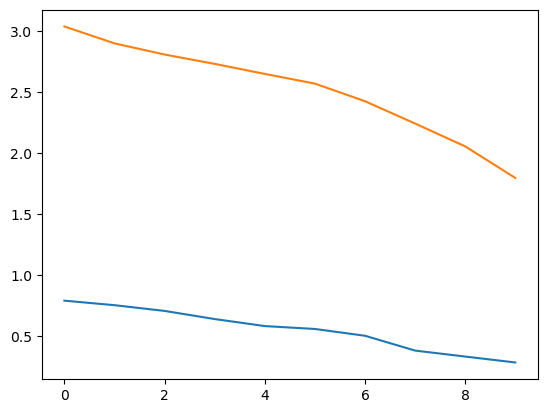

In [16]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend

In [18]:
n_past = 16
n_days_for_prediction=15  #let us predict past 15 years

#predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction).tolist()
#print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction




1/1 [==============================] - 0s 362ms/step


In [20]:
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

print(y_pred_future)
   

[31.48909  26.581165 25.330803 24.226902 29.391361 31.887917 36.446774
 41.43738  47.27778  56.98298  64.307205 71.698395 76.46421  78.59365
 78.60027 ]


In [28]:
dates = train_dates[-n_days_for_prediction:]

predictions = y_pred_future[-n_days_for_prediction:]

# Create a DataFrame from the selected dates and predictions
df_predictions = pd.DataFrame({
    'Year': dates,
    'Predicted_Value': predictions
})
print(df_predictions)

    Year  Predicted_Value
31  2001        31.489090
32  2002        26.581165
33  2003        25.330803
34  2004        24.226902
35  2005        29.391361
36  2006        31.887917
37  2007        36.446774
38  2008        41.437382
39  2009        47.277779
40  2010        56.982979
41  2011        64.307205
42  2012        71.698395
43  2013        76.464211
44  2014        78.593651
45  2015        78.600273


In [31]:
Actual_data = data.iloc[:,0:2]
print(Actual_data)

    Year  Ireland_Public_Debt_Pc_of_GDP
0   1970                          41.65
1   1971                          39.85
2   1972                          37.34
3   1973                          35.09
4   1974                          43.45
5   1975                          48.34
6   1976                          51.70
7   1977                          49.15
8   1978                          50.65
9   1979                          54.95
10  1980                          56.06
11  1981                          59.80
12  1982                          63.77
13  1983                          71.07
14  1984                          75.05
15  1985                          76.14
16  1986                          86.22
17  1987                          87.09
18  1988                          84.77
19  1989                          77.37
20  1990                          93.18
21  1991                          94.55
22  1992                          91.55
23  1993                          94.12


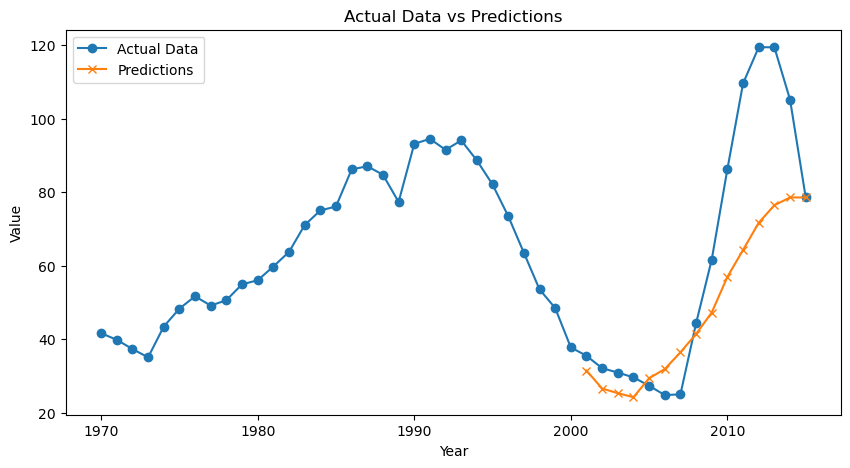

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))  # Set the figure size for better readability
plt.plot(Actual_data.iloc[:, 0], Actual_data.iloc[:, 1], label='Actual Data', marker='o')
plt.plot(df_predictions.iloc[:, 0], df_predictions.iloc[:, 1], label='Predictions', marker='x')
plt.title('Actual Data vs Predictions')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()
